In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
import sys
sys.path.append('../scripts/') 
from bias import *
from stats import *

In [2]:
conv_reflect = pd.read_excel("../data/reflect_write/raw/Conversational Reflection Texte.xlsx")
conv_reflect.shape

(59, 2)

In [3]:
conv_reflect.groupby("Gruppe").size()

Gruppe
CG     20
TG1    20
TG2    19
dtype: int64

In [4]:
conv_reflect_bias = clean_calc_bias(conv_reflect.copy(), 'Texte')
conv_reflect_bias.sample(10)

/Users/su/Desktop/writing bias/notebooks/../scripts/bias.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file /Users/su/Desktop/writing bias/notebooks/../scripts/bias.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  sentences = BeautifulSoup(text).get_text(" ")


,Gruppe,Texte,Texte_clean,word_gender,word_dict,total_words,total_unique_words,total_m_cooc,total_f_cooc,bias_records,bias_score
16,CG,In meinem Arbeitsalltag habe ich die Möglichke...,arbeitsalltag möglichkeit bekommen unbekannten...,"{'arbeitsalltag': {'m': 1e-06, 'f': 1e-06, 'fe...","{'arbeitsalltag': 1, 'möglichkeit': 1, 'bekomm...",321,218,19.000218,38.000218,"{'arbeitsalltag': {'m': 1e-06, 'f': 1e-06, 'fe...",-0.3893
22,TG1,Ich spreche später mit meiner Praktikumsverant...,spreche später praktikumsverantwortlichen darü...,"{'spreche': {'m': 1e-06, 'f': 1e-06, 'female':...","{'spreche': 1, 'später': 1, 'praktikumsverantw...",35,31,19.000031,0.000031,"{'spreche': {'m': 1e-06, 'f': 1e-06, 'female':...",-5.2815
17,CG,Ich habe meine Weiterbildung im September 2022...,weiterbildung september gestartet praktikum fü...,"{'weiterbildung': {'m': 1e-06, 'f': 1e-06, 'fe...","{'weiterbildung': 1, 'september': 1, 'gestarte...",135,117,19.000117,57.000117,"{'weiterbildung': {'m': 1e-06, 'f': 1e-06, 'fe...",-0.2258
8,CG,Ich ging zu einer Klientin welche ein Stoma ha...,ging klientin stoma platte stoma locker erneue...,"{'ging': {'m': 1e-06, 'f': 1e-06, 'female': []...","{'ging': 1, 'klientin': 1, 'stoma': 4, 'platte...",119,83,0.000083,0.000083,"{'ging': {'m': 1e-06, 'f': 1e-06, 'female': []...",0.0000
4,CG,Im Praxisalltag habe ich die Erfahrung auf ein...,praxisalltag erfahrung demenz abteilung gemach...,"{'praxisalltag': {'m': 1e-06, 'f': 1e-06, 'fem...","{'praxisalltag': 1, 'erfahrung': 1, 'demenz': ...",96,76,70.000076,19.000076,"{'praxisalltag': {'m': 1e-06, 'f': 1e-06, 'fem...",2.0195
29,TG1,ich bin als bezugspflegeperson auf der station...,bezugspflegeperson station kognitiv eingeschrä...,"{'bezugspflegeperson': {'m': 1e-06, 'f': 1e-06...","{'bezugspflegeperson': 1, 'station': 2, 'kogni...",168,129,38.000129,169.000129,"{'bezugspflegeperson': {'m': 1e-06, 'f': 1e-06...",-2.3689
55,TG2,Ich habe vor meinem Studium eine Ausbildung zu...,studium ausbildung fachfrau gesundheit begonne...,"{'studium': {'m': 1e-06, 'f': 1e-06, 'female':...","{'studium': 1, 'ausbildung': 1, 'fachfrau': 1,...",164,131,0.000131,72.000131,"{'studium': {'m': 1e-06, 'f': 1e-06, 'female':...",9.7831
41,TG2,Am morgen kahm ich auf die Station und musst e...,morgen kahm station musst blutentnahme bevor z...,"{'morgen': {'m': 1e-06, 'f': 1e-06, 'female': ...","{'morgen': 1, 'kahm': 3, 'station': 1, 'musst'...",114,79,114.000079,55.000079,"{'morgen': {'m': 1e-06, 'f': 1e-06, 'female': ...",3.5303
0,CG,Da ich qereinsteger bin war für mich alles ein...,qereinsteger neue erfahrung damals lehre autom...,"{'qereinsteger': {'m': 1e-06, 'f': 1e-06, 'fem...","{'qereinsteger': 1, 'neue': 2, 'erfahrung': 1,...",53,51,19.000051,19.000051,"{'qereinsteger': {'m': 1e-06, 'f': 1e-06, 'fem...",-0.0000
6,CG,Ich habe Bew. unterstützt beim Skypen . Er hat...,bew unterstützt beim skypen er schwierigkeiten...,"{'bew': {'m': 1e-06, 'f': 1e-06, 'female': [],...","{'bew': 1, 'unterstützt': 1, 'beim': 1, 'skype...",71,51,221.000051,0.000051,"{'bew': {'m': 1e-06, 'f': 1e-06, 'female': [],...",-0.9700


In [5]:
conv_reflect_bias.isna().sum()

Gruppe                0
Texte                 0
Texte_clean           0
word_gender           0
word_dict             0
total_words           0
total_unique_words    0
total_m_cooc          0
total_f_cooc          0
bias_records          0
bias_score            0
dtype: int64

In [12]:
conv_reflect_bias.to_csv("../data/reflect_write/reflect_ml.csv")
conv_reflect_bias.Texte_clean.to_csv("../data/reflect_write/weat/reflect_ml.txt", index=False, header=False)

## WEAT COOC

In [ ]:
# !python -m spacy download de_core_news_sm

In [11]:
!python weat_de_cooc.py \
    --data "/Users/su/Desktop/writing bias/data/reflect_write/weat/reflect_ml.txt" \
    --output "/Users/su/Desktop/writing bias/output/weat" \
    --processing_cores 7 \
    --tests 1 2 3 4 5 6 7 8 9 10

Please make sure that your input texts are whitespace separated tokens. The script might not work correctly otherwise.
Generating target-association test pairs...
Extracting candidate posts...
 87%|████████████████████████████████▎    | 6601/7557 [00:02<00:00, 6434.77it/s]post psychiatrie gearbeitet damals jährige ersten mal schwer chronifizierten suchpataientn tun gut ersten patienten erinnern zuständig herr s er seit vielen jahren heroin abhängig methadon programm zusätzlich er laufe zeit alkoholproblem entwickelt er kleine tochter ehefrau ersten mal ihm gesprochen er nieder geschlagen er sagte er wolle geben er wider heroin aufhören könne tochter liebe nahm ernst meinung entzug erfolg er wenigen tagen ersten rückfall überrast wusste wieso dachte er sei motiviert jedoch dachte passieren versucht darüber sprechen genau auslöser gewesene sei er wider konsumiert sagte er alten dealer stadt getroffen widerstehen konnte zusammen strategie erarbeitet zukunft umgehen ungefähr woche später k

## GenBit COOC

In [6]:
for g in conv_reflect_bias.Gruppe.unique():
    print(g)
    check_gaussianity(conv_reflect_bias[conv_reflect_bias.Gruppe==g].bias_score)

CG
Shapiro-Wilk Test: Statistics=0.908, p=0.058
Sample looks Gaussian (fail to reject H0)
D'Agostino's K^2 Test: Statistics=3.574, p=0.167
Sample looks Gaussian (fail to reject H0)
Kolmogorov-Smirnov Test: Statistics=0.158, p=0.641
Sample looks Gaussian (fail to reject H0)
TG1
Shapiro-Wilk Test: Statistics=0.921, p=0.106
Sample looks Gaussian (fail to reject H0)
D'Agostino's K^2 Test: Statistics=2.539, p=0.281
Sample looks Gaussian (fail to reject H0)
Kolmogorov-Smirnov Test: Statistics=0.159, p=0.635
Sample looks Gaussian (fail to reject H0)
TG2
Shapiro-Wilk Test: Statistics=0.962, p=0.610
Sample looks Gaussian (fail to reject H0)
D'Agostino's K^2 Test: Statistics=0.914, p=0.633
Sample looks Gaussian (fail to reject H0)
Kolmogorov-Smirnov Test: Statistics=0.132, p=0.851
Sample looks Gaussian (fail to reject H0)


/Users/su/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
two_sample_ttest(conv_reflect_bias[conv_reflect_bias.Gruppe=='CG'].bias_score, conv_reflect_bias[conv_reflect_bias.Gruppe=='TG1'].bias_score)

Do not reject the null hypothesis - suggest the sample means are similar


(1.3787924913555323, 0.1760215733555435)

In [8]:
two_sample_ttest(conv_reflect_bias[conv_reflect_bias.Gruppe=='CG'].bias_score, conv_reflect_bias[conv_reflect_bias.Gruppe=='TG1'].bias_score)

Do not reject the null hypothesis - suggest the sample means are similar


(1.3787924913555323, 0.1760215733555435)

In [9]:
two_sample_ttest(conv_reflect_bias[conv_reflect_bias.Gruppe=='TG1'].bias_score, conv_reflect_bias[conv_reflect_bias.Gruppe=='TG1'].bias_score)

Do not reject the null hypothesis - suggest the sample means are similar


(0.0, 1.0)

Text(0.5, 0, 'Group')

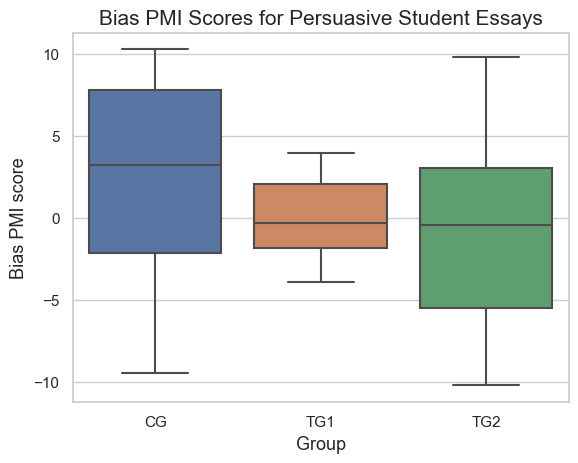

In [10]:
sns.boxplot(data=conv_reflect_bias, x="Gruppe", y="bias_score")
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('Bias PMI Scores for Persuasive Student Essays', fontsize=15)
plt.ylabel('Bias PMI score', fontsize=13)
plt.xlabel('Group', fontsize=13)
# labels = [item.get_text() for item in plt.gca().get_xticklabels()]
# labels[0] = 'G1: Feedback'
# labels[1] = 'G2: Rewritten'
# plt.gca().set_xticklabels(labels)